In [1]:
import os
import sys
import cv2
import torch
import numpy as np
import pandas as pd
from torchvision import transforms
from torch.utils.data import Dataset
from tqdm import tqdm
from pathlib import Path
from torch.utils.data import DataLoader
from utils.datasets import PoseDataset
from utils.plots import plot_heatmaps
import matplotlib.pyplot as plt
from misc.helper_functions import denormalize_image



In [2]:
dataset_dir = './heatmapdataset'
dataset = PoseDataset(dataset_dir=dataset_dir, is_train=True, vis_enabled='True')



loading annotations from:  heatmapdataset/labels/labels.csv


100%|██████████| 4/4 [00:00<00:00, 682.25it/s]


 Annotations loaded



keypoints before transforms: 
 [[243.  518. ]
 [217.  396. ]
 [364.  390. ]
 [249.  505.1]
 [230.  390. ]
 [364.  384. ]]
keypoints after transforms: 
 [[233.1   238.2  ]
 [178.2   253.8  ]
 [175.5   165.6  ]
 [227.295 234.6  ]
 [175.5   246.   ]
 [172.8   165.6  ]]


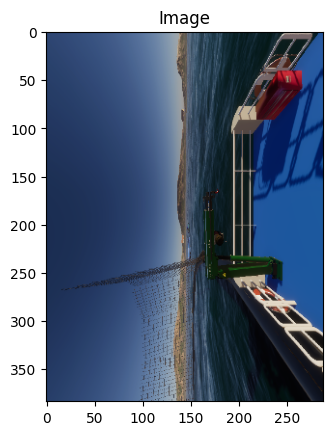

weights tensor([[[1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [0.]]], dtype=torch.float64)


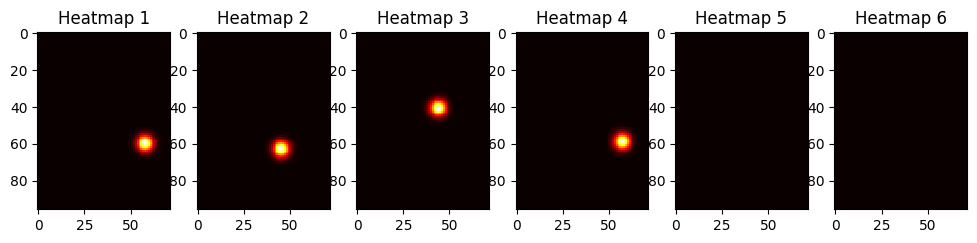

In [3]:

image, heatmaps_gt, target_weight, sample_data = dataset.__getitem__(1)
#image = denormalize_image(image.cpu(), mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
target_weight = torch.from_numpy(target_weight).unsqueeze(0)
print("weights",target_weight)

heatmaps_gt = torch.from_numpy(heatmaps_gt).unsqueeze(0)

# Convert the tensor to a numpy array
heatmaps_np = heatmaps_gt.squeeze().numpy()

# Determine the number of heatmaps
num_heatmaps = heatmaps_np.shape[0]

# Create subplots to visualize each heatmap separately
fig, axs = plt.subplots(1, num_heatmaps, figsize=(12, 6))

# Plot each heatmap
for i in range(num_heatmaps):
    axs[i].imshow(heatmaps_np[i], cmap='hot', interpolation='nearest')
    axs[i].set_title(f'Heatmap {i+1}')

    


Resized and replaced: ./heatmapdataset/images/imgl11.png
Resized and replaced: ./heatmapdataset/images/imgl5.png
Resized and replaced: ./heatmapdataset/images/imgl12.png
Resized and replaced: ./heatmapdataset/images/imgl1.png
Resized and replaced: ./heatmapdataset/images/imgl6.png
Resized and replaced: ./heatmapdataset/images/imgl4.png
Resized and replaced: ./heatmapdataset/images/imgl10.png
Resized and replaced: ./heatmapdataset/images/imgl8.png
Resized and replaced: ./heatmapdataset/images/imgl2.png
Resized and replaced: ./heatmapdataset/images/imgl9.png
Resized and replaced: ./heatmapdataset/images/imgl13.png
Resized and replaced: ./heatmapdataset/images/imgl0.png
Resized and replaced: ./heatmapdataset/images/imgl3.png
Resized and replaced: ./heatmapdataset/images/imgl7.png


In [4]:
from models.hrnet.hrnet import HRNet
from misc.checkpoint import load_checkpoint
from misc.helper_functions import denormalize_image

dataset_dir = './heatmapdataset'
dataset = PoseDataset(dataset_dir=dataset_dir, is_train=True, vis_enabled='True')
checkpoint_dir = './misc/checkpoint.py'
# check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('\ndevice: ', device)



# load model
model = HRNet(c=48, nof_joints=6).to(device)
_, model, _, _ = load_checkpoint(checkpoint_dir, model, device=device)
model.eval()



image, heatmaps_gt, target_weights, labels = dataset.__getitem__(2)

# convert heatmaps_gt to torch tensor and squeeze
heatmaps_gt = torch.from_numpy(heatmaps_gt).squeeze()

# make preds
heatmaps_pred = model(image.unsqueeze(0).to(device)).squeeze()
image = denormalize_image(image.cpu(), mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))

# save sample original img
img = plt.imread(labels['imgPath'])
fig_name = 'sample'
#plt.imsave(os.path.join(fig_output_dir, fig_name + '.jpg'), img)

# save plot_heatmaps
plot_heatmaps(image, heatmaps_gt, heatmaps_pred, save_to=fig_output_dir, file_name='plot_heatmaps')


loading annotations from:  heatmapdataset/labels/labels.csv


100%|██████████| 4/4 [00:00<00:00, 729.98it/s]


 Annotations loaded


device:  cuda


UnpicklingError: could not find MARK

In [ ]:
"""#Resize images in your dataset:

# Define your directory containing the images
image_directory = './heatmapdataset/images'

# Desired output size
image_width = 288
image_height = 384

# Loop through all the files in the directory
for file_name in os.listdir(image_directory):
    file_path = os.path.join(image_directory, file_name)
    
    # Check if the file is an image based on its extension
    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Read the image
        img = cv2.imread(file_path)
        
        # Resize the image
        resized_img = cv2.resize(img, (image_width, image_height))
        
        # Save the resized image back to the same location, overwriting the original
        cv2.imwrite(file_path, resized_img)
        print(f'Resized and replaced: {file_path}')
"""

In [4]:

normalized_coordinates = [
    [0.39, 0.80, 0.35, 0.62, 0.52, 0.66, 0.39, 0.78, 0.35, 0.61, 0.52, 0.65],
    [0.38, 0.81, 0.34, 0.62, 0.57, 0.61, 0.39, 0.79, 0.36, 0.61, 0.57, 0.60],
    [0.36, 0.82, 0.34, 0.62, 0.53, 0.49, 0.39, 0.80, 0.37, 0.61, 0.54, 0.49],
    [0.36, 0.82, 0.34, 0.62, 0.56, 0.47, 0.39, 0.80, 0.37, 0.61, 0.56, 0.47]
]

image_size = (640, 640)  # Width x Height

pixel_coordinates = []
for coords in normalized_coordinates:
    pixel_coords = []
    for i in range(0, len(coords), 2):
        x_normalized, y_normalized = coords[i], coords[i + 1]
        x_pixel = int(x_normalized * image_size[0])
        y_pixel = int(y_normalized * image_size[1])
        pixel_coords.extend([x_pixel, y_pixel])
    pixel_coordinates.append(pixel_coords)

print(pixel_coordinates)


[[249, 512, 224, 396, 332, 422, 249, 499, 224, 390, 332, 416], [243, 518, 217, 396, 364, 390, 249, 505, 230, 390, 364, 384], [230, 524, 217, 396, 339, 313, 249, 512, 236, 390, 345, 313], [230, 524, 217, 396, 358, 300, 249, 512, 236, 390, 358, 300]]
